In [6]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import time

In [7]:
LENGTH = 40
SIZE = 10
MAX_WEIGHT = 10.0
MAX_VALUE = 10.0
LIMIT = 100.0
G_END = 2000
PROB = 0.01
PROB2 = 0.5

gene = np.zeros((2*SIZE,LENGTH),dtype=int)
next_gene = np.zeros((2*SIZE,LENGTH),dtype=int)
weight = [0.0]*LENGTH
value = [0.0]*LENGTH
total_weight = [0.0]*(2*SIZE)
total_value = [0.0]*(2*SIZE)
v_sort = [0]*(2*SIZE)

df_weight = pd.DataFrame({
    'xdf':np.arange(1,G_END+1),
    'ydf':np.arange(1,G_END+1)},
    index = np.arange(1,G_END+1))

df_value = pd.DataFrame({
    'xdf':np.arange(1,G_END+1),
    'ydf':np.arange(1,G_END+1)},
    index = np.arange(1,G_END+1))


#print (gene)
#print(weight)
#イニシャライズ
for k in np.arange(0,SIZE):
    for l in np.arange(0,LENGTH):
        if random.random() < PROB2:
           gene[k,l]=1
           
#品物の重さと価値の設定
for l in np.arange(0,LENGTH):
    weight[l]=MAX_WEIGHT*random.random()
    value[l]=MAX_VALUE*random.random()

#メインははじまり
for g in np.arange(1,G_END+1):
    
    #交差
    for k in np.arange(0,SIZE,2):
        #k=k+2
        l_rand = random.randrange(LENGTH)
        #print(l_rand)
        #a=input()
        for l in np.arange(0,l_rand):
            gene[k+SIZE][l]=gene[k][l]
        for l in np.arange(l_rand,LENGTH):
            gene[k+SIZE][l]=gene[k+1][l]
        for l in np.arange(0,l_rand):
            gene[k+SIZE+1][l]=gene[k+1][l]
        for l in np.arange(l_rand,LENGTH):
            gene[k+SIZE+1][l]=gene[k][l]
            
    # 突然変異
    for k in np.arange(SIZE,2*SIZE):
        for l in np.arange(0,LENGTH):
            if random.random() < PROB:
                gene[k][l]=1-gene[k][l]
                
    #目的関数の計算
    for k in np.arange(0,2*SIZE):
        total_weight[k]=0.0
        total_value[k]=0.0
        for l in np.arange(0,LENGTH):
            total_weight[k]=total_weight[k]+gene[k][l]*weight[l]
            total_value[k]=total_value[k]+gene[k][l]*value[l]
        if total_weight[k]>LIMIT:
            total_value[k]=0.0
            
    #ソート
    for k in np.arange(0,2*SIZE):
        v_sort[k]=k
    for k in np.arange(0,2*SIZE):
        for k_sort in np.arange(k+1,2*SIZE):
            if total_value[k] <total_value[k_sort]:
                swap                = total_value[k_sort]
                total_value[k_sort] = total_value[k]
                total_value[k]      = swap
                i_swap              = v_sort[k_sort]
                v_sort[k_sort]      = v_sort[k]
                v_sort[k]           = i_swap       
                
    #新世代に置き換え
    for k in np.arange(0,2*SIZE):
        for l in np.arange(0,LENGTH):
            next_gene[k][l] = gene[v_sort[k]][l]
    for k in np.arange(0,2*SIZE):
        for l in np.arange(0,LENGTH):
            gene[k][l] = next_gene[k][l]
            
    df_weight.iloc[g-1,1]=total_weight[v_sort[0]]
    df_value.iloc[g-1,1]=total_value[0]

C:\Users\G15\AppData\Local\Temp\ipykernel_21356\3854715839.py:97: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '98.9443426245885' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_weight.iloc[g-1,1]=total_weight[v_sort[0]]
C:\Users\G15\AppData\Local\Temp\ipykernel_21356\3854715839.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '86.6830735472176' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_value.iloc[g-1,1]=total_value[0]


In [8]:
print("{:8.3f} {:8.3f}".format(total_weight[v_sort[0]], total_value[0]))

  99.325  126.122


,xdf,ydf
1,1,98.944343
2,2,98.944343
3,3,98.944343
4,4,98.944343
5,5,98.944343
...,...,...
1996,1996,99.324935
1997,1997,99.324935
1998,1998,99.324935
1999,1999,99.324935


<function matplotlib.pyplot.show(close=None, block=None)>

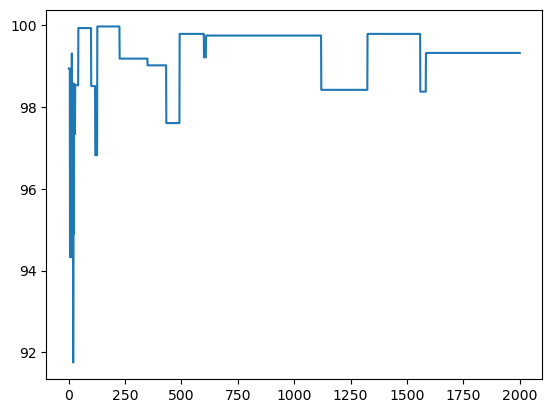

In [9]:
display(df_weight)
plt.plot('xdf','ydf',data=df_weight)
plt.show

,xdf,ydf
1,1,86.683074
2,2,86.683074
3,3,86.683074
4,4,86.683074
5,5,86.683074
...,...,...
1996,1996,126.122252
1997,1997,126.122252
1998,1998,126.122252
1999,1999,126.122252


<function matplotlib.pyplot.show(close=None, block=None)>

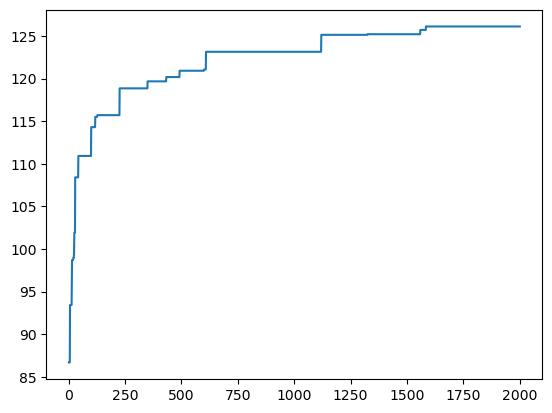

In [10]:
display(df_value)
plt.plot('xdf','ydf',data=df_value)
plt.show